<a href="https://colab.research.google.com/github/isaacchunn/SC1015_MiniPrj_Airbnb/blob/main/Airbnb_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset : Airbnb Singapore Dataset from InsideAirbnb
#### Question : If we were an AirBnb host, how can we maximise our profit?


Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/


# Contents
  1. Linear Regression
  2. Regression 2
  3. Regression 3

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [475]:
# Isaac Chun Jun Heng U2221389B
# J'sen Ong Jia Xuan  U2220457J
# Tang Teck Meng U2221809C

In [476]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #We only need pyplot
sb.set() #Set the default Seaborn style for graphics

### Additional Libraries

Import additional libraries

> sklearn : Conduct linear regression analysis

In [477]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### General Utility Functions

In [478]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

In [479]:
def removeOutliers(df, colName):
  q1 = df[colName].quantile(0.25)
  q3 = df[colName].quantile(0.75)
  iqr = q3-q1
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  result = df.loc[(df[colName] >= low) & (df[colName] <= high)]
  return result

In [480]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [481]:
#Define a regression func to easily calculate regression among two variables
def calcLinRegression(predictor, response, testSize = 0.2, solidLine = False, f_size = (20,10), xTitle = None, yTitle = None):

    #Get the appropriate data from train and put them in DF!
    #Check if the inputs are valid
    if (predictor is None or response is None):
        print("Invalid input into regression function")
        return
     
    #Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)

    #Then calculate the linear regression using train data
    linreg = LinearRegression();
    linreg.fit(X_train, y_train);

    #Print Coefficients of the Linear Regression line
    print("Regression intercept \t\t: b = ", linreg.intercept_)
    print("Regression coefficients \t: a = ",linreg.coef_)

    #Predict the values corresponding to the predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    #Print the mean squared and root mean squared error on the train data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Train)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    mseTrain =  mean_squared_error(X_train, y_train_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Print the mean squared and root mean squared error on the test data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Test)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    mseTrain =  mean_squared_error(X_test, y_test_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Plot the regression line
    f = plt.figure(figsize = f_size)
    plt.scatter(X_train, y_train)
    if xTitle:
      plt.xlabel(xTitle)
    if yTitle:
      plt.ylabel(yTitle)
    if solidLine:
        plt.plot(X_train,y_train_pred,'r-', linewidth = 2)
    else:
        plt.scatter(X_train, y_train_pred, color = "r")
    print()

    #Then return a tuple of the predictions
    return (y_test, y_train_pred, y_test_pred)

In [482]:
def calcLinRegressionCategorical(response, predictor, testSize = 0.2):
  # Split the Dataset into Train and Test
  X_train, X_test, y_train, y_test = train_test_split(response, predictor, test_size = testSize)

  # fit model
  linreg = LinearRegression()
  linreg.fit(X_train, y_train)

  # predict
  y_train_pred = linreg.predict(X_train)

  # Goodness of Fit for Train Data
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:",
        mean_squared_error(y_train, y_train_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print()

  # Accuracy for Test Data
  y_test_pred = linreg.predict(X_test)
  print("Accuracy of Model        \tTest Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print()
  return y_train, y_train_pred, y_test, y_test_pred

### Mount Google Drive (unused, uncomment if need add anything from google drive.)

In [483]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

---

>## Hypothesis  

1. The number of amenities a listing provides will affect its price, the more the amenities, the higher the listing price
2. Variables related to a listing's review will have positive correlation to listing's price

---

>## Import the Dataset  

We have imported the cleaned dataset based on our EDA done in the other files.

In [484]:
url = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/listings_cleaned.csv"
airDF = pd.read_csv(url)
airDF.head()

,name,listing_url,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,Ensuite Room (Room 1 & 2) near EXPO,https://www.airbnb.com/rooms/71609,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34537,...,20.0,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,B&B Room 1 near Airport & EXPO,https://www.airbnb.com/rooms/71896,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34754,...,24.0,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,Room 2-near Airport & EXPO,https://www.airbnb.com/rooms/71903,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.34531,...,47.0,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Amazing Room with window 10min to Redhill,https://www.airbnb.com/rooms/275343,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.29015,...,22.0,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,15 mins to Outram MRT Single Room,https://www.airbnb.com/rooms/275344,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.28836,...,14.0,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f


In [485]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          3035 non-null   object 
 1   listing_url                   3035 non-null   object 
 2   description                   2968 non-null   object 
 3   neighborhood_overview         1968 non-null   object 
 4   host_response_time            2405 non-null   object 
 5   host_response_rate            2405 non-null   object 
 6   host_acceptance_rate          2284 non-null   object 
 7   neighbourhood_cleansed        3018 non-null   object 
 8   neighbourhood_group_cleansed  3018 non-null   object 
 9   latitude                      3018 non-null   float64
 10  longitude                     3018 non-null   float64
 11  property_type                 3018 non-null   object 
 12  accommodates                  3018 non-null   float64
 13  ame

In [486]:
print(airDF.dtypes)

name                             object
listing_url                      object
description                      object
neighborhood_overview            object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
accommodates                    float64
amenities                        object
price                            object
minimum_nights                  float64
maximum_nights                  float64
number_of_reviews               float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64


---

>## Cleaning our DataFrame/Dataset

### 1. Drop properties with N/A or 0% acceptance rate as these properties do not get stayed at by visitors.

In [487]:
#Drop all the properties that has no host acceptance rate then drop
airDF = airDF.dropna(subset=["host_acceptance_rate"])
#Then remove all the 0% acceptance rate
airDF = airDF[airDF["host_acceptance_rate"] != 0]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF.head(n=5)

,name,listing_url,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,Ensuite Room (Room 1 & 2) near EXPO,https://www.airbnb.com/rooms/71609,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34537,...,20.0,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,B&B Room 1 near Airport & EXPO,https://www.airbnb.com/rooms/71896,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34754,...,24.0,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,Room 2-near Airport & EXPO,https://www.airbnb.com/rooms/71903,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.34531,...,47.0,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Amazing Room with window 10min to Redhill,https://www.airbnb.com/rooms/275343,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.29015,...,22.0,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,15 mins to Outram MRT Single Room,https://www.airbnb.com/rooms/275344,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.28836,...,14.0,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f


### 2. Clean the price column using code as it has "$", "," and "." 


In [488]:
airDF["price"]

0       $46,437.00 
1           $81.00 
2           $81.00 
3           $52.00 
4           $49.00 
           ...     
2279        $45.00 
2280        $45.00 
2281       $186.00 
2282       $797.00 
2283       $434.00 
Name: price, Length: 2284, dtype: object

In [489]:
breaks = [",", "$"]
for i in range(len(airDF["price"])):
    s = airDF.loc[:,("price")][i]
    for x in breaks:
        s = s.replace(x,"")
    s = "".join(s.split(".")[:-1])
    airDF.loc[:,("price")][i] = int(s)
airDF = airDF.astype({'price': 'int32'})

<ipython-input-489-e0f04e7ead66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF.loc[:,("price")][i] = int(s)


We also remove any outliers as it is unrealistic for a property to have above > $45,000 per night

In [490]:
airDF = airDF[airDF.price < 1000]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF["price"]

0        81
1        81
2        52
3        49
4       175
       ... 
2226     45
2227     45
2228    186
2229    797
2230    434
Name: price, Length: 2231, dtype: int32

### 3. Convert the amenities column to a list, and add a new column with the number of amenities to be used for our prediction.

In [491]:
airDF["amenities"]

0       ["Cooking basics", "Refrigerator", "Kitchen", ...
1       ["Cooking basics", "Heating", "Kitchen", "Hair...
2       ["Air conditioning", "Shampoo", "Smoke alarm",...
3       ["Air conditioning", "Shampoo", "Smoke alarm",...
4       ["Cooking basics", "Kitchen", "Private entranc...
                              ...                        
2226    ["Air conditioning", "Fire extinguisher", "Sec...
2227    ["Air conditioning", "Fire extinguisher", "Sec...
2228    ["Air conditioning", "Fire extinguisher", "Sec...
2229    ["First aid kit", "EV charger", "Heating", "Re...
2230    ["Air conditioning", "Fire extinguisher", "Fir...
Name: amenities, Length: 2231, dtype: object

In [492]:
#Add a new column of amenities
airDF["no_amenities"] = 0
#Replace all with the integer variant
count = 0
for x in airDF["amenities"]:   
    #Convert string into list
    #Convert string into list
    x = x.replace('[',"")
    x = x.replace(']',"")
    x = x.replace('"', "")
    x = x.replace(", ", ",")
    x = x.split(",")
    airDF["amenities"][count] = x
    airDF["no_amenities"][count] = len(x)
    count += 1

<ipython-input-492-a56617251945>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = x
<ipython-input-492-a56617251945>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(x)


In [493]:
airDF["amenities"].head(n=5)

0    [Cooking basics, Refrigerator, Kitchen, Hair d...
1    [Cooking basics, Heating, Kitchen, Hair dryer,...
2    [Air conditioning, Shampoo, Smoke alarm, Long ...
3    [Air conditioning, Shampoo, Smoke alarm, Long ...
4    [Cooking basics, Kitchen, Private entrance, Ha...
Name: amenities, dtype: object

In [494]:
airDF["no_amenities"].head(n=5)

0    31
1    26
2    17
3    18
4    32
Name: no_amenities, dtype: int64

In [495]:
#Want to visualize the total count of amenities so we can form a generalization such that our number of amenities remains reliable.
amenityCount = {}
for x in airDF["amenities"]:
    for item in x:
        if item in amenityCount:
            amenityCount[item] += 1
        else:
            amenityCount[item] = 1
        
#Add it to a DF
amenityCountDF = pd.DataFrame(columns = ["amenity", "count"])
count = 0
for keys, values in amenityCount.items():
    amenityCountDF.loc[count] = [keys, values]
    count += 1

#Sort the DF
amenityCountDF = amenityCountDF.sort_values(by="count", ascending = False)
amenityCountDF.head(n=15)

,amenity,count
9,Long term stays allowed,2218
7,Wifi,2167
32,Air conditioning,2061
17,Essentials,1913
2,Kitchen,1800
43,Hangers,1770
39,Iron,1707
30,Washer,1678
26,Hot water,1588
3,Hair dryer,1516


In [496]:
amenityCountDF.tail(n=10)

,amenity,count
160,Essential shampoo,1
278,24-hour fitness center,1
285,Toiletries,1
279,Kitchenette,1
280,Free wifi,1
281,Complimentary self parking,1
282,Limited housekeeping \u2014 weekly,1
283,Laundry services,1
284,Bed sheets and pillows,1
388,Coffee maker: french press,1


We have decided to only use those amenities that are very prominent in most of the listings as the number of amenities should be consistent, and not be filled with many values that do not matter. For example, we do not know what Fire TV is.

In [497]:
#Changeable cutoff that are determined by us to check for robustness of our model
amenityCutOff = 30

In [498]:
uselessAmenityList = amenityCountDF[amenityCountDF["count"] <= amenityCutOff]["amenity"].values.tolist()

In [499]:
#Remove all values in our df that correspond to our useless amenity list
count = 0
for x in airDF["amenities"]:
    l = [i for i in x if i not in uselessAmenityList]
    airDF["amenities"][count] = l
    airDF["no_amenities"][count] = len(l)
    count +=1

<ipython-input-499-ae78827c68ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = l
<ipython-input-499-ae78827c68ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(l)


### 4. Fill in na values in host_response_time to be a value as we are using it to gather insights

In [500]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 95


In [501]:
airDF["host_response_time"].value_counts()

within an hour        827
within a few hours    725
within a day          472
a few days or more    112
Name: host_response_time, dtype: int64

In [502]:
#Fill it to be the worst scenario to achieve better distribution
airDF = airDF.fillna(value = {"host_response_time": "a few days or more"})
None

In [503]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 0


In [504]:
airDF["host_response_time"].value_counts()

within an hour        827
within a few hours    725
within a day          472
a few days or more    207
Name: host_response_time, dtype: int64

---

>## Splitting the Dataset

In [505]:
#Split the dataset into train and test in 80:20 ratio
train_data, test_data = train_test_split(airDF, test_size = 0.2, random_state = 55)

#Print out what we have in our test and train data
print("Train Data :")
print("Data type : ", type(train_data))
print("Data dim : ", train_data.shape)
print("---------------------------------------")
print("Test Data :")
print("Data type : ", type(test_data))
print("Data dim : ", test_data.shape)
print("---------------------------------------")

Train Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (1784, 28)
---------------------------------------
Test Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (447, 28)
---------------------------------------


---

>## 1. Linear Regression 

In [506]:
priceDF = airDF["price"]
priceDF.head(n=5)

0     81
1     81
2     52
3     49
4    175
Name: price, dtype: int32

---
##One - hot encoding all the potential categorical variables !


In [507]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#we will exclude amenities since that feature requires individual data cleaning
potentialFeaturesDF = pd.DataFrame(airDF[["host_response_time","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type", "accommodates", "number_of_reviews", "no_amenities"]])

#pull out all the categorical variables into airbnb_cat DF
cat_variables = ['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type']
airbnb_cat = potentialFeaturesDF[cat_variables]

#OHE airbnb_cat categorical predictors
ohe.fit(airbnb_cat)
airbnb_cat_ohe = pd.DataFrame(ohe.transform(airbnb_cat).toarray(),
                             columns=ohe.get_feature_names_out(airbnb_cat.columns))

airbnb_cat_ohe

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,...,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in condo,property_type_Shared room in guesthouse,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in serviced apartment
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2228,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [508]:
num_variable = []
for i in potentialFeaturesDF:
    if i not in cat_variables:
        num_variable.append(i)
num_variable

['accommodates', 'number_of_reviews', 'no_amenities']

In [509]:
# Combining Numeric features with the OHE Categorical features
airbnb_num = potentialFeaturesDF[num_variable]
airbnbData_ohe = pd.concat([airbnb_num , airbnb_cat_ohe],sort=False,axis=1).reindex(index=airbnb_num.index)

# Check the final dataframe
airbnbData_ohe

,accommodates,number_of_reviews,no_amenities,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,...,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in condo,property_type_Shared room in guesthouse,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in serviced apartment
0,1.0,24.0,28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,47.0,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,22.0,17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,14.0,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,12.0,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1.0,0.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2227,1.0,0.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2228,4.0,0.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229,3.0,0.0,39,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---


In [510]:
def plot_actual_vs_pred(y, y_pred, title=None):
    plot_df = pd.concat([pd.DataFrame(y, columns=['price']), pd.DataFrame(y_pred, columns=['price_pred'])], axis=1, join='inner')
    plot_df.sort_values(by=['price'], inplace=True)
    plot_df.reset_index(inplace=True, drop=True)
    ax = sb.lineplot(data=plot_df)
    if title:
        ax.set_title(title)

---
##1a) All features vs price

In [511]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe.drop(num_variable, axis=1))
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4389690672114167
Mean Squared Error (MSE) 	: 22210.630184977577
Root Mean Squared Error (RMSE) 	: 149.03231255327677

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: -1.9275029959015544e+23
Mean Squared Error (MSE) 	: 9.95440076868646e+27
Root Mean Squared Error (RMSE) 	: 99771743337913.38



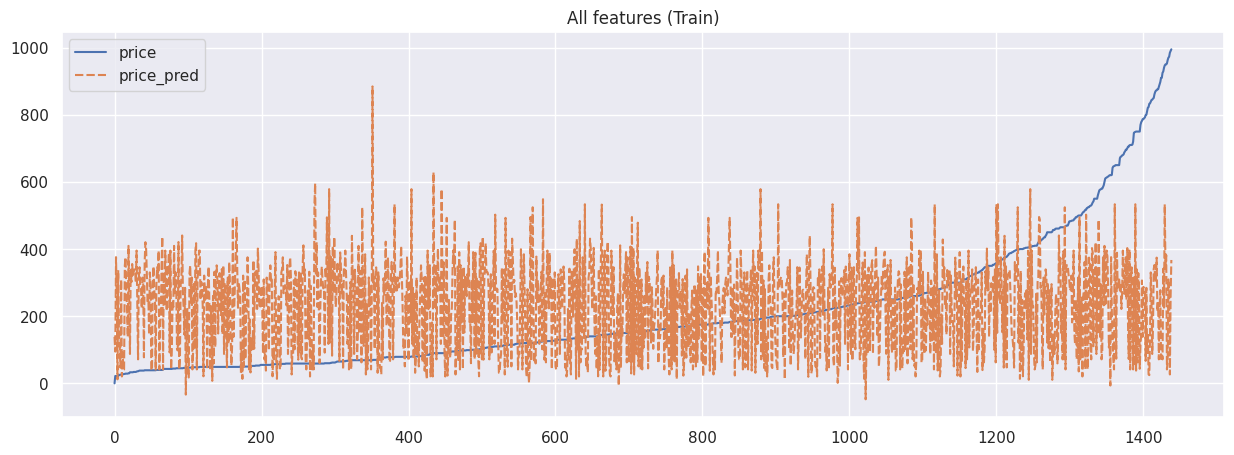

In [512]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title='All features (Train)')

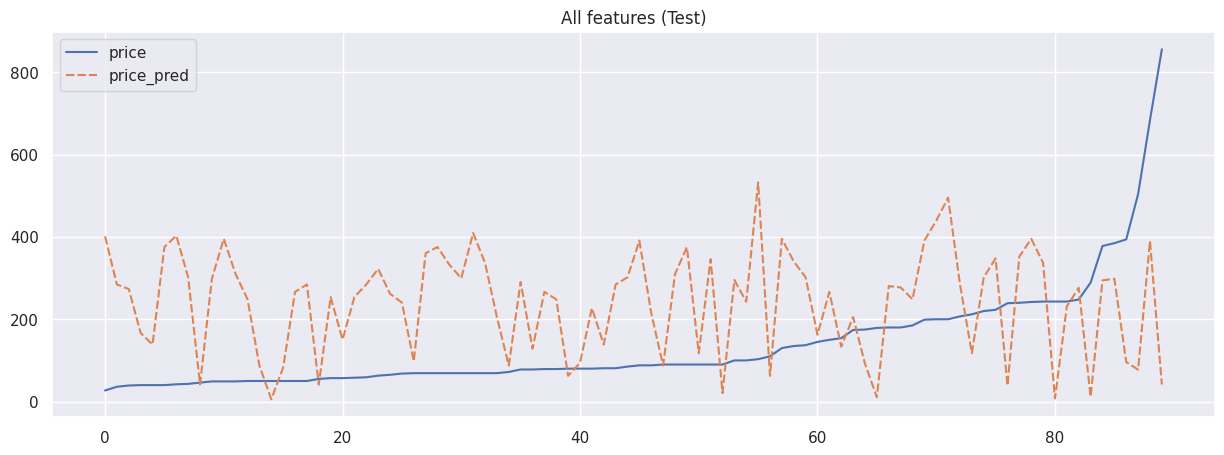

In [513]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='All features (Test)')

---
## 1b) host_response_time vs price 

In [514]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'host_response_time' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.017362864100890052
Mean Squared Error (MSE) 	: 41608.860986547086
Root Mean Squared Error (RMSE) 	: 203.98250166753786

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 4.1662772110040436e-07
Mean Squared Error (MSE) 	: 40911.87416107383
Root Mean Squared Error (RMSE) 	: 202.26683900499813



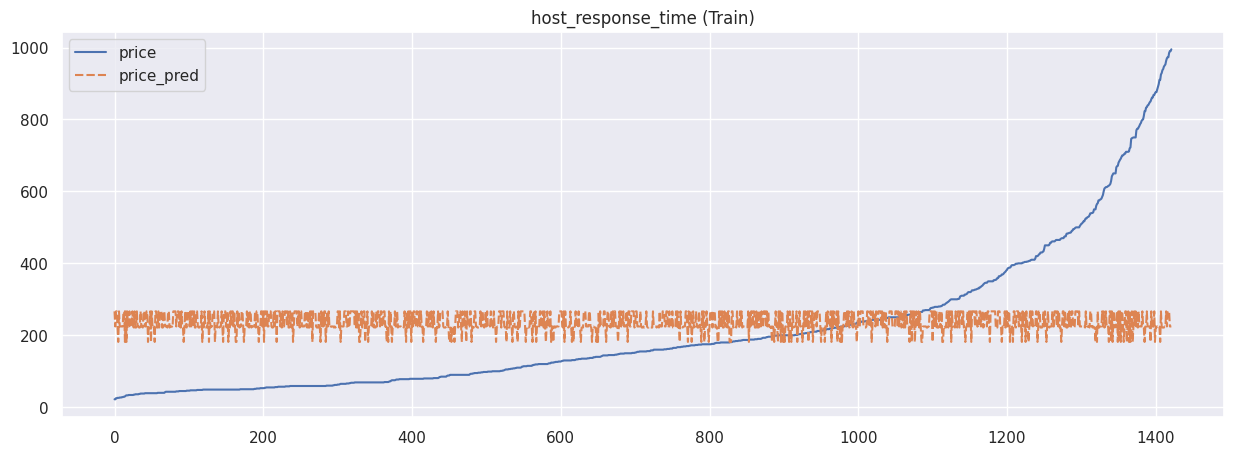

In [515]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="host_response_time (Train)")

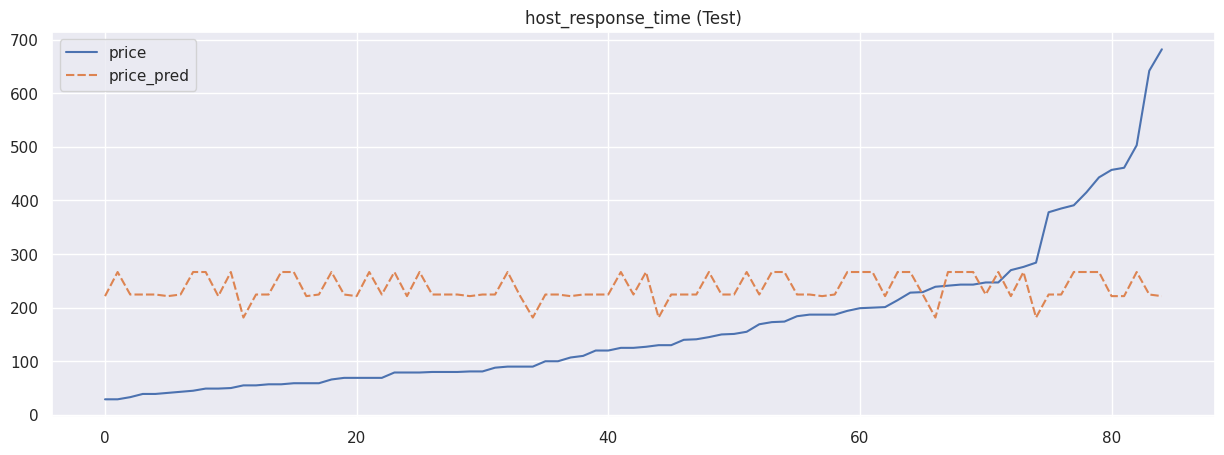

In [516]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="host_response_time (Test)")


---
## 1c) neighbourhood_cleansed vs price 

In [517]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'neighbourhood_cleansed' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23381667327028077
Mean Squared Error (MSE) 	: 32826.79428251121
Root Mean Squared Error (RMSE) 	: 181.18166099942678

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.165442153745469
Mean Squared Error (MSE) 	: 32361.23937360179
Root Mean Squared Error (RMSE) 	: 179.89229937271298



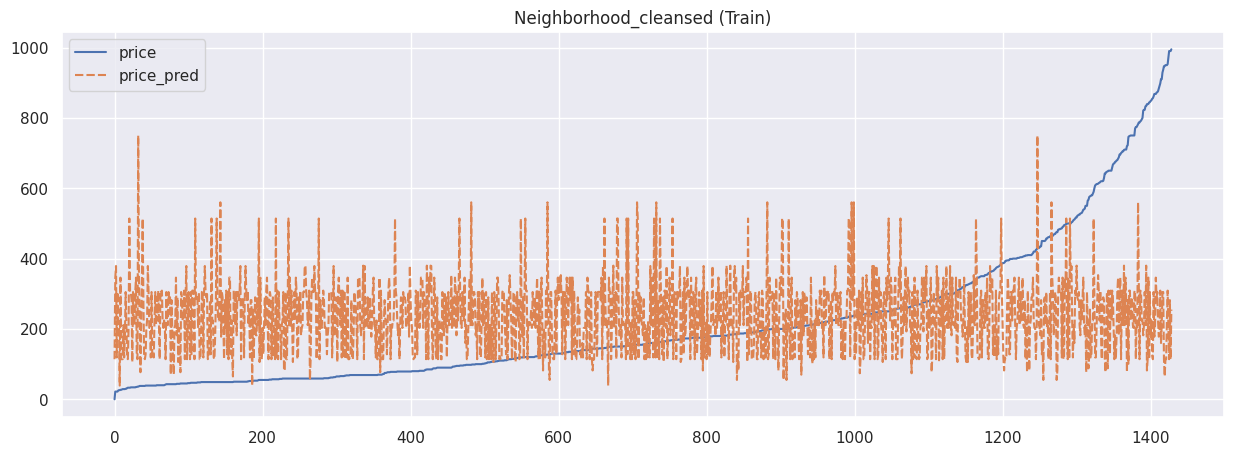

In [518]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="Neighborhood_cleansed (Train)")

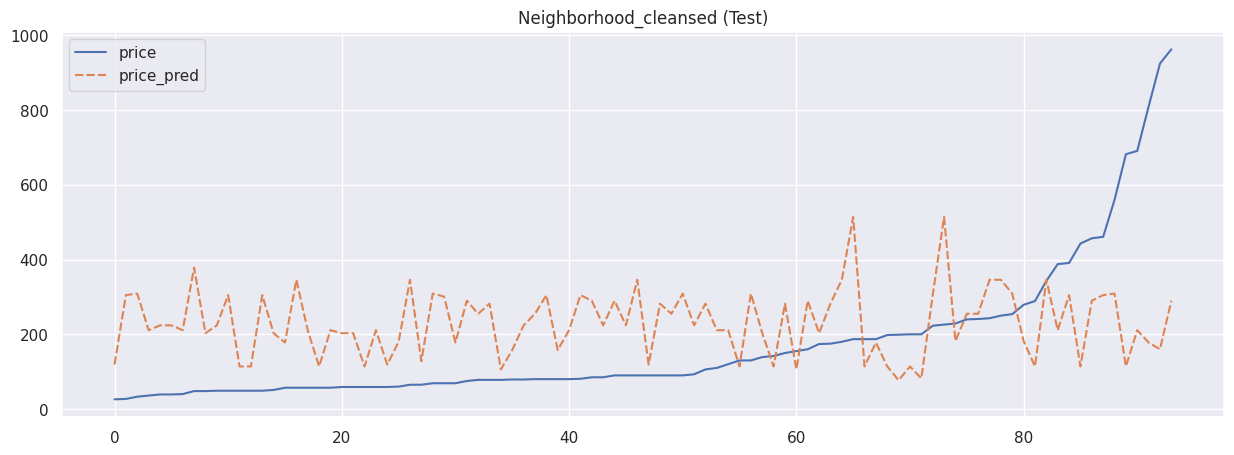

In [519]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="Neighborhood_cleansed (Test)")

---
##1d) property_type vs price 

In [520]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'property_type' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3661867247222811
Mean Squared Error (MSE) 	: 27434.030829596413
Root Mean Squared Error (RMSE) 	: 165.63221555481414

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: -1.3762449020419429e+24
Mean Squared Error (MSE) 	: 5.110075995137867e+28
Root Mean Squared Error (RMSE) 	: 226054772016382.5



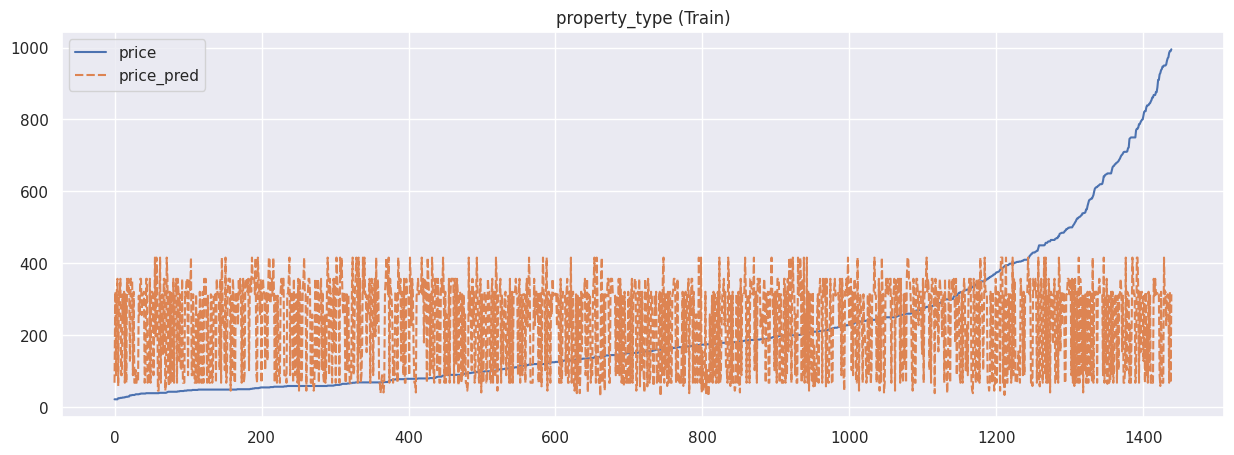

In [521]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="property_type (Train)")

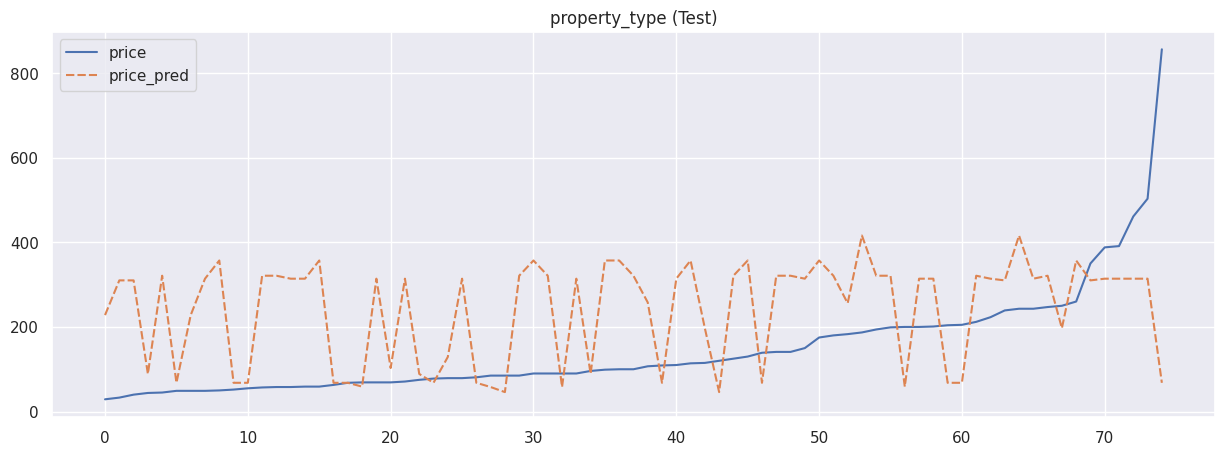

In [522]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="property_type (Test)")

#### 1e) accommodates vs price 

Regression intercept 		: b =  94.45487470266522
Regression coefficients 	: a =  [52.44249276]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.20705584597376414
Mean Squared Error (MSE)	: 60991.261949484986
Root Mean Squared Error (RMSE) 	: 246.96409040482988
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.155797343632034
Mean Squared Error (MSE)	: 65022.31960372877
Root Mean Squared Error (RMSE) 	: 254.9947442668746



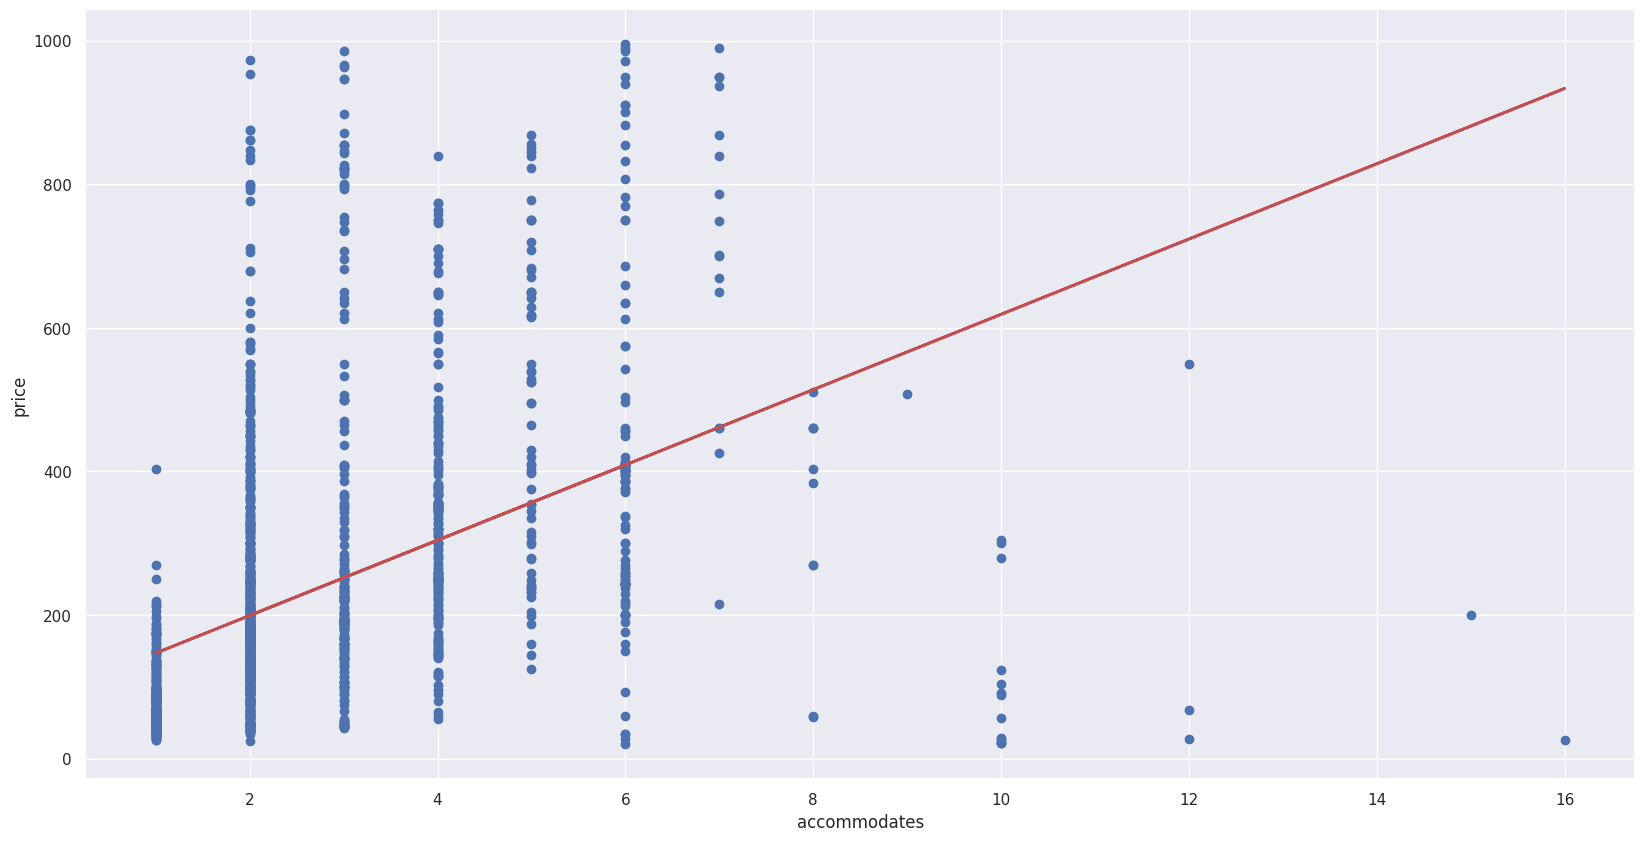

In [523]:
#Try to predict price using accommodates
accommodatesDF = pd.DataFrame(airDF["accommodates"])
price_test, price_train_pred, price_test_pred = calcLinRegression(accommodatesDF, priceDF, solidLine= True, xTitle = "accommodates", yTitle = "price")
None

Using linear regression, the explained variance of just ~0.10 to ~0.14 shows that accommodates does not prove to be very useful in being a factor that affects price, and its mean squared error is very high.

#### 1f) amenities vs price 

We will go through two approaches, one using the amenities in a one hot encoding, and the other using the number of amenities.

In [524]:
#Insert categorical prediction (JSEN PLS BUCK UP)

Regression intercept 		: b =  87.36241023281556
Regression coefficients 	: a =  [6.02856624]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.08562150837445903
Mean Squared Error (MSE)	: 46581.13565789523
Root Mean Squared Error (RMSE) 	: 215.8266333377214
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.12078577048496564
Mean Squared Error (MSE)	: 48913.341578112544
Root Mean Squared Error (RMSE) 	: 221.16360816850622



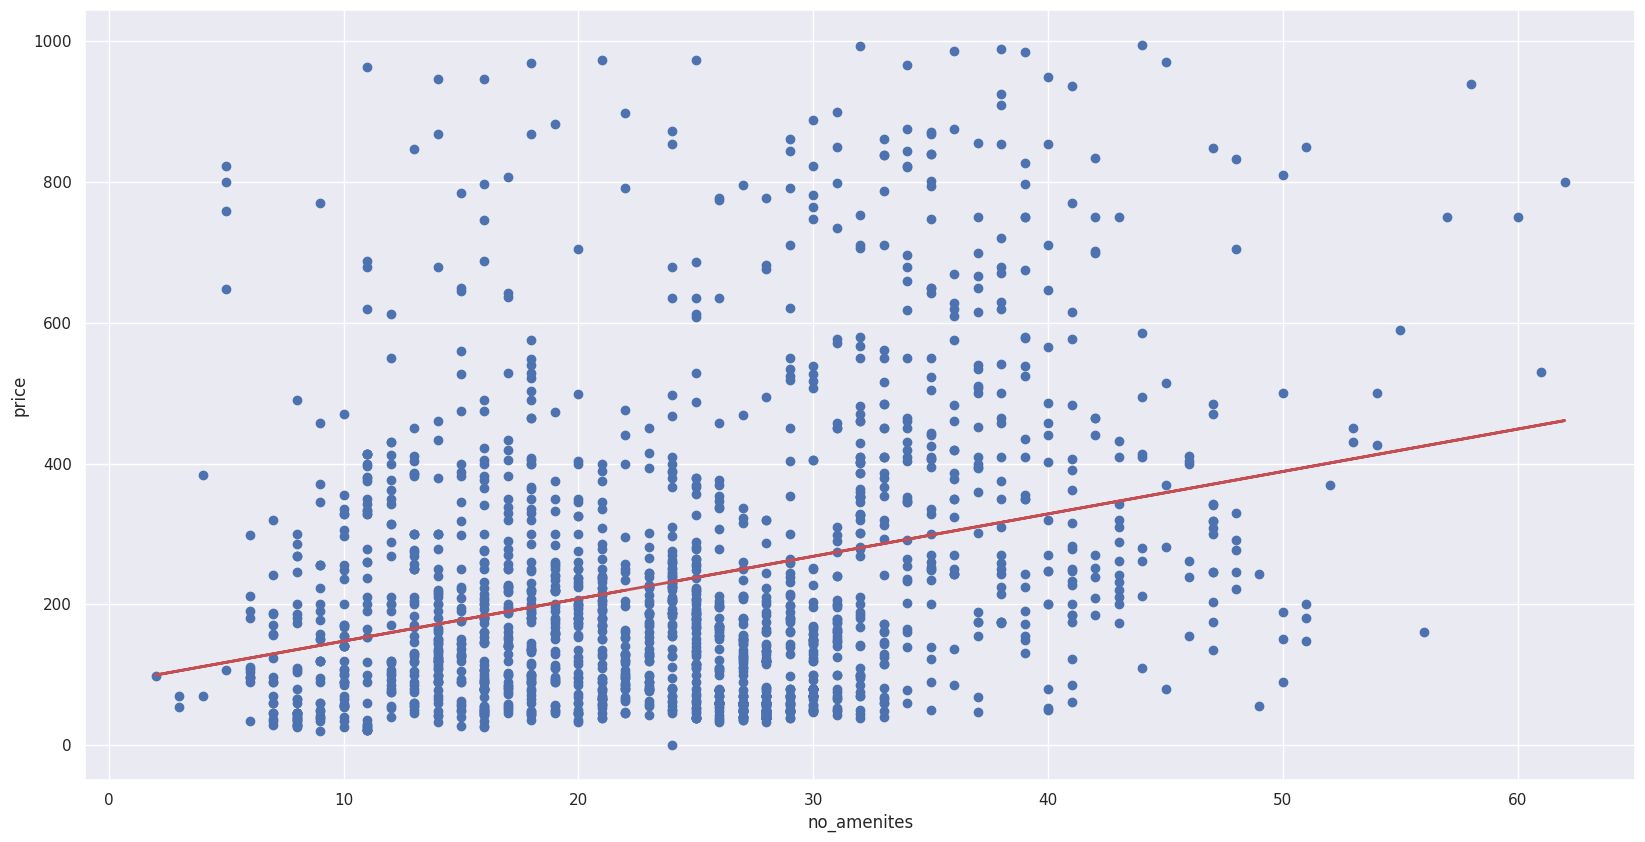

In [525]:
#Try to predict price using no_amenities
noAmenitiesDF = pd.DataFrame(airDF["no_amenities"])
price_test, price_train_pred, price_test_pred = calcLinRegression(noAmenitiesDF, priceDF, solidLine= True, xTitle = "no_amenites", yTitle = "price")
None

#### 1g) number_of_reviews vs price 

Regression intercept 		: b =  245.874556534524
Regression coefficients 	: a =  [-0.87366421]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.016448955999436965
Mean Squared Error (MSE)	: 54200.212084071485
Root Mean Squared Error (RMSE) 	: 232.80939002555607
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.012059902837684877
Mean Squared Error (MSE)	: 55925.56955379973
Root Mean Squared Error (RMSE) 	: 236.48587601334614



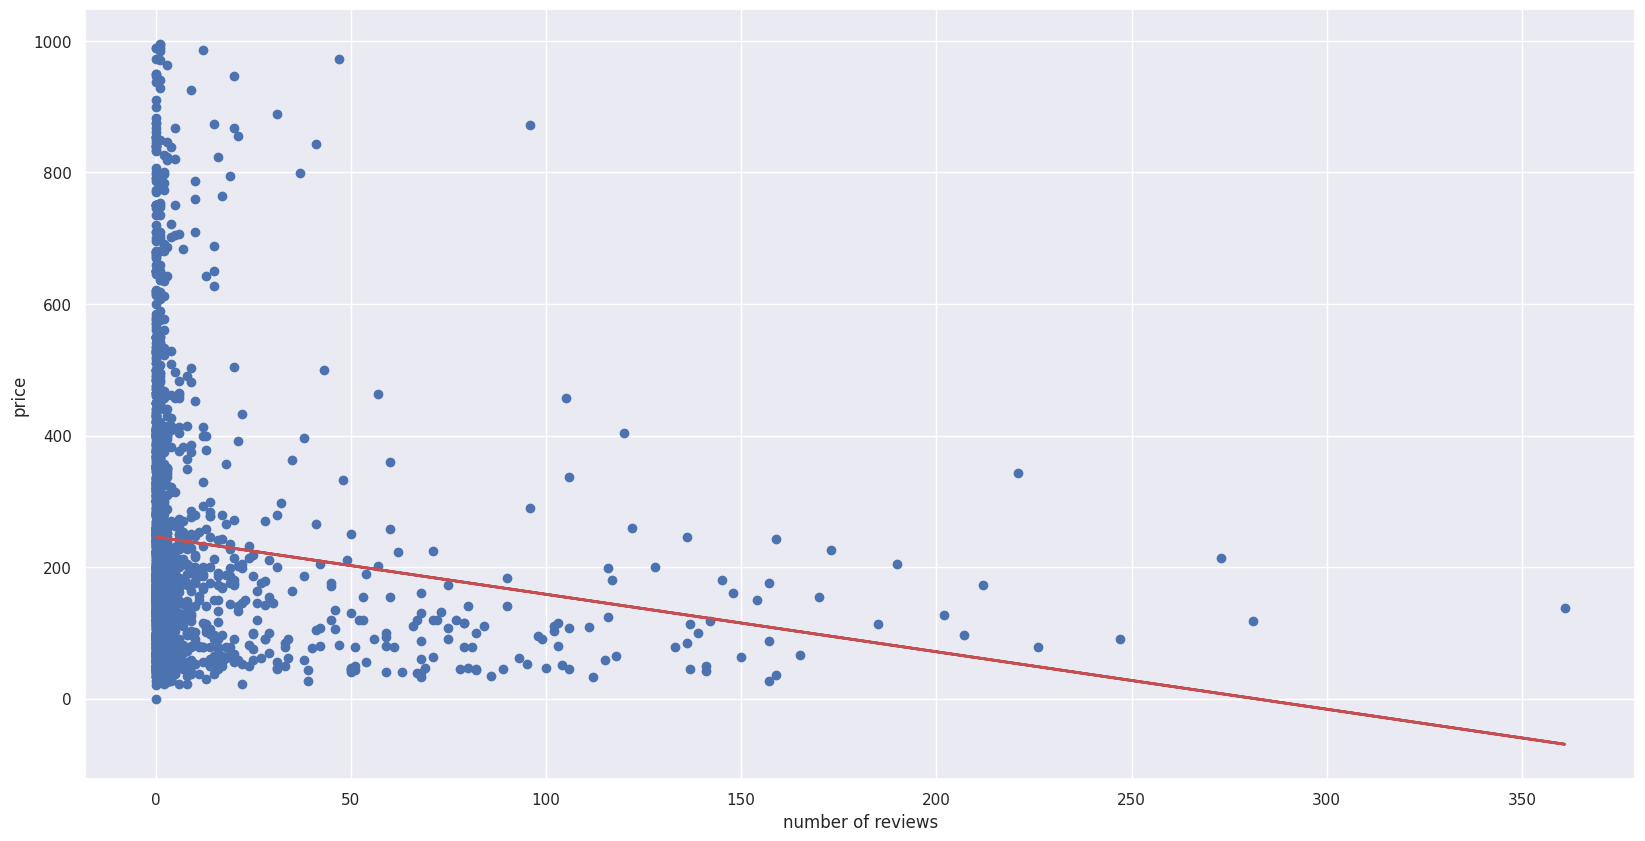

In [526]:
#Try to predict price using number_of_reviews
reviewsDF = pd.DataFrame(airDF["number_of_reviews"])
price_test, price_train_pred, price_test_pred = calcLinRegression(reviewsDF, priceDF, solidLine= True, xTitle = "number of reviews", yTitle = "price")
None